In [8]:
#The script requires the csv raw data under the relative path "../data/raw"
#Figures will be saved under "../figures"
#Resulting tables are saved under "../data/metafor"

#Load packages
#
library(ggpubr)
library(reshape2)
library(sm)
library(latex2exp)
library("RColorBrewer")

In [9]:
file_name<-"../data//raw/Farmer_effect.csv"
#Read input datafile 
df<-read.csv(file=file_name, header=TRUE, sep=",")

columns<-c("Recovered"
           ,"Not.recovered"
          )
df_stacked<-na.omit(stack(df,select = columns,drop = TRUE))

Warning message:
“Removed 229 rows containing non-finite values (stat_qq).”Warning message:
“Removed 229 rows containing non-finite values (stat_qq_line).”Warning message:
“Removed 229 rows containing non-finite values (stat_qq_line).”

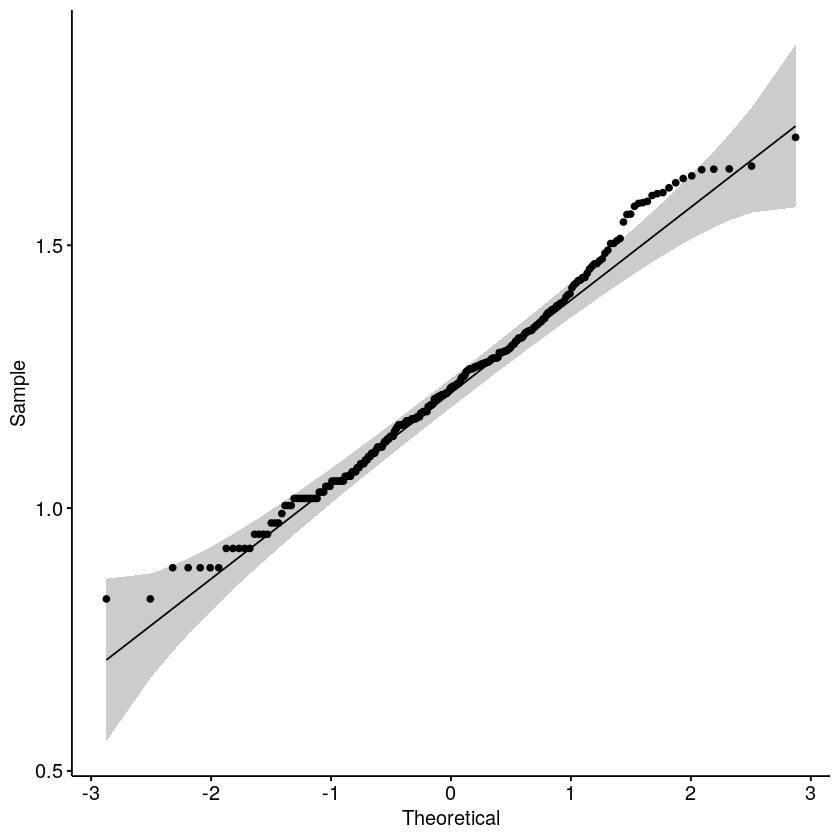

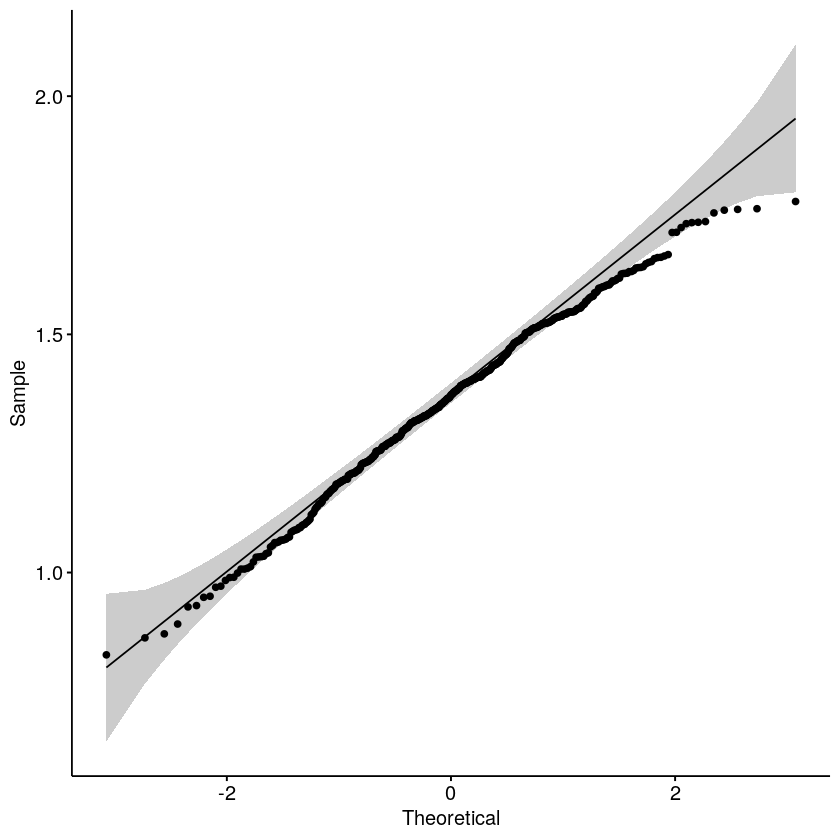

In [20]:
par(mfrow=c(2,1))
#hist((df$Recovered)**0.1)
#hist((df$Not.recovered)**0.1)
ggqqplot((df$Recovered)**0.1)
ggqqplot((df$Not.recovered)**0.1)


In [21]:
tpow<-0.1
t.test(df$Recovered**0.1,df$Not.recovered**0.1,alternative = "two.sided",mu = 0)


	Welch Two Sample t-test

data:  df$Recovered^0.1 and df$Not.recovered^0.1
t = -9.0845, df = 487, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1579370 -0.1017666
sample estimates:
mean of x mean of y 
 1.232965  1.362817 


Warning message:
“Removed 229 rows containing non-finite values (stat_qq).”Warning message:
“Removed 229 rows containing non-finite values (stat_qq_line).”Warning message:
“Removed 229 rows containing non-finite values (stat_qq_line).”

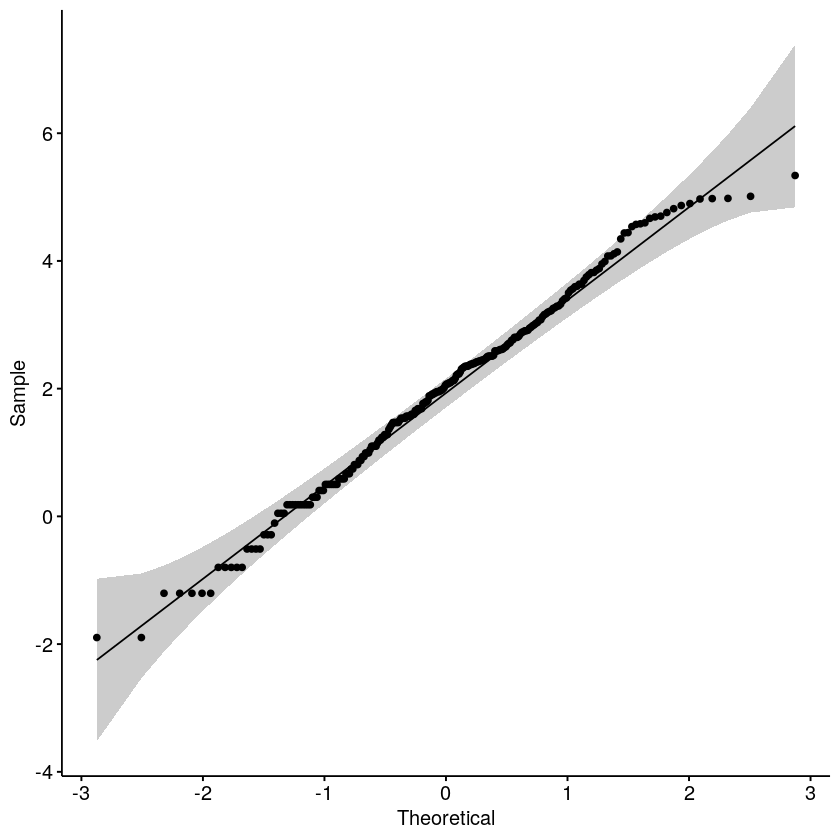

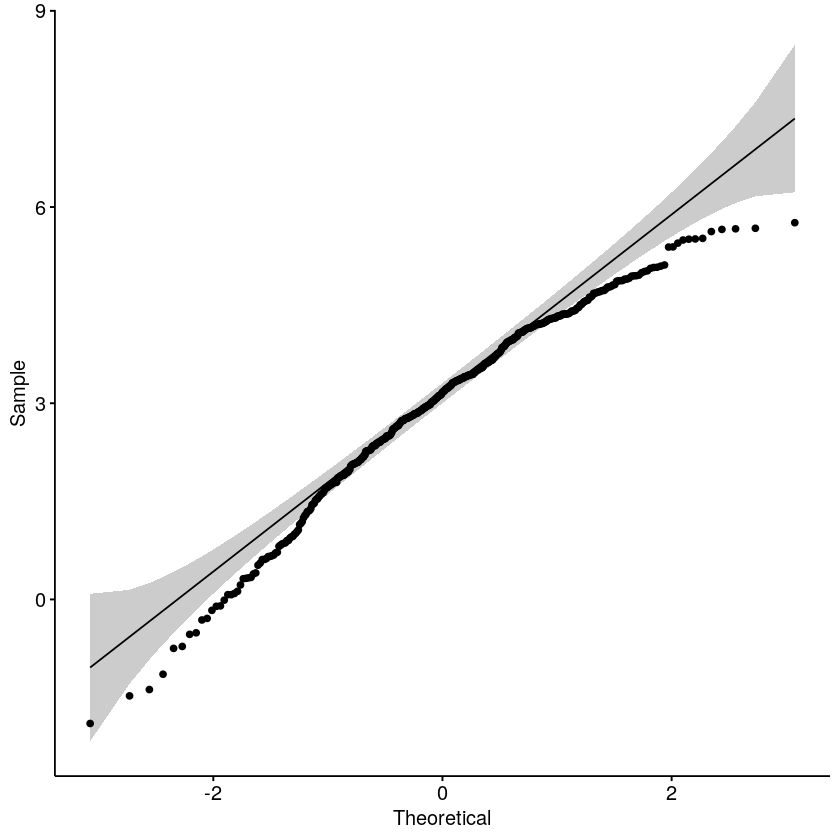

In [8]:
tpow<-0.1


ggqqplot(log(df$Recovered))
ggqqplot(log(df$Not.recovered))

In [15]:
tpow<-0.1
shapiro.test((df$Recovered)**0.1)
shapiro.test((df$Not.recovered)**0.1)


	Shapiro-Wilk normality test

data:  (df$Recovered)^0.1
W = 0.98689, p-value = 0.02383



	Shapiro-Wilk normality test

data:  (df$Not.recovered)^0.1
W = 0.99207, p-value = 0.01251


In [23]:
wilcox.test(df$Recovered,df$Not.recovered,alternative = "two.sided",mu = 0)


	Wilcoxon rank sum test with continuity correction

data:  df$Recovered and df$Not.recovered
W = 34896, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



Test of equal densities:  p-value =  0 


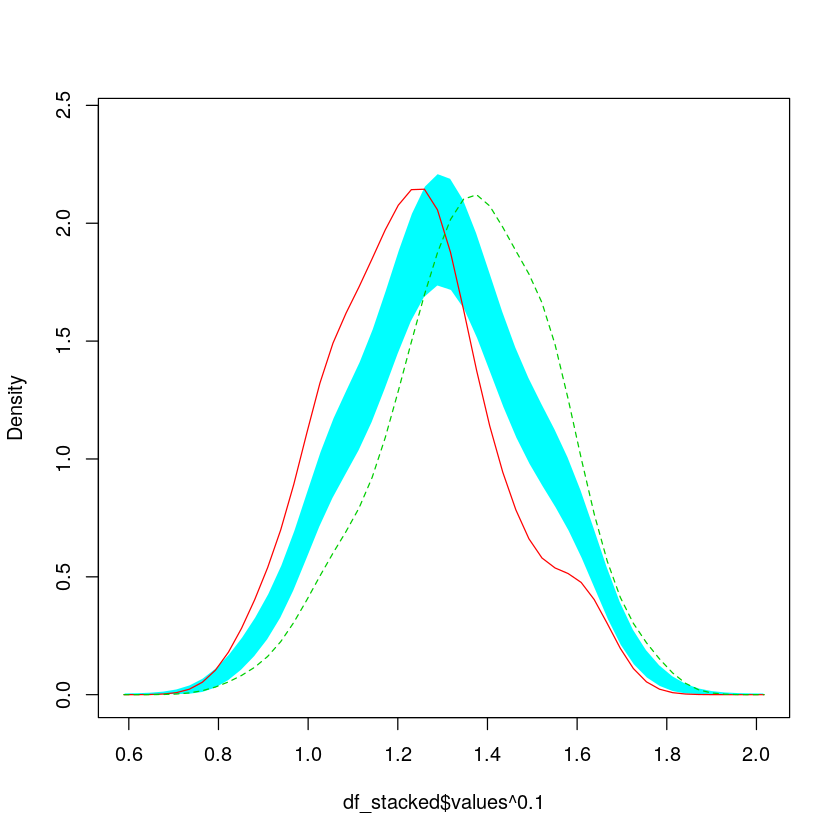

In [7]:
sm.density.compare(x=df_stacked$values**0.1, group=df_stacked$ind, model="equal")


Test of equal densities:  p-value =  0 


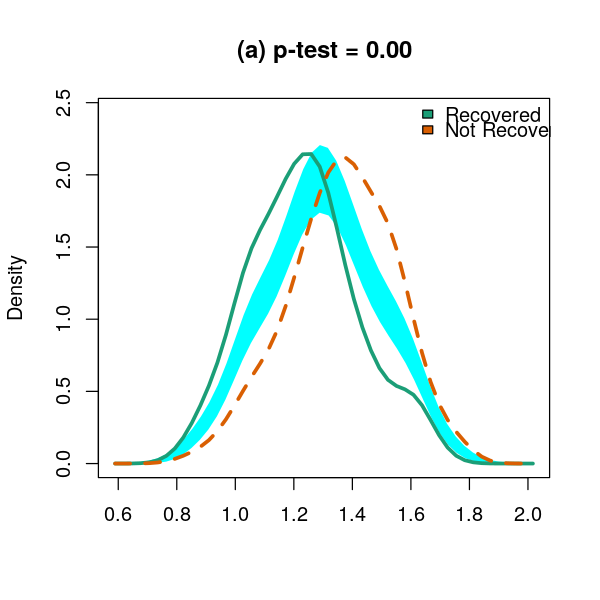

In [18]:
options(repr.plot.width=5, repr.plot.height=5)

#plot setup 
res.test<-data.frame()

nc=length(columns)

indx<-1
colours <- brewer.pal(n = 8, name = "Dark2")

for(i in seq(from = 1,to = nc)){
    for(j in seq(from = 1,to = nc)){
        if(j<=i){next}
        cc<-columns[i]
        dd<-columns[j]
        res.wilcox <- wilcox.test(df[,cc]**0.1,df[,dd]**0.1)
        res.test<-rbind(res.test,data.frame(d1=cc,d2=dd,p=res.wilcox$p.value))
        df_tmp<-df_stacked[is.element(df_stacked$ind, c(cc,dd)),]
                
        sm.density.compare(x=df_tmp$values**0.1
                           , group=df_tmp$ind
                           , mode="equal"
                           ,col=c(colours[i],colours[j])
                           ,col.palette = "green"
                           ,ylab="Density"
                           ,xlab=ifelse(indx>12,TeX("Plastic Film Residue ($kg ha^{-1}$)"),"")
                          ,lwd=3

                          )
        title(main=sprintf("(%s) p-test = %0.2f",letters[indx],res.wilcox$p.value))
        legend("topright"
               , legend = c("Recovered ", "Not Recovered ") #unique(df_tmp$ind)
               , fill=c(colours[i],colours[j])
               ,cex=1
               ,
               ,bty = "n"
              )
        indx<-indx+1
    }
}

In [16]:
?legend